In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from torchvision import datasets, transforms

In [3]:
transformation = transforms.Compose([
       transforms.ToTensor(),
       transforms.Normalize((0.5,), (0.5,))
])

In [4]:
train_dataset = datasets.MNIST(
                               'data/',
                               train=True,
                               transform=transformation,
                               download=True
)

In [5]:
test_dataset = datasets.MNIST(
                               'data/',
                               train=False,
                               transform=transformation,
                               download=True
)

In [6]:
train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size=64,
                                           shuffle=True)

In [7]:
test_loader = torch.utils.data.DataLoader(test_dataset,
                                           batch_size=64,
                                           shuffle=False)

In [8]:
imgs, labels = next(iter(train_loader))

In [9]:
imgs.shape

torch.Size([64, 1, 28, 28])

In [10]:
labels.shape

torch.Size([64])

In [11]:
img = imgs[0] / 2 + 0.5

In [12]:
img.shape

torch.Size([1, 28, 28])

In [13]:
img = np.squeeze(img.numpy())

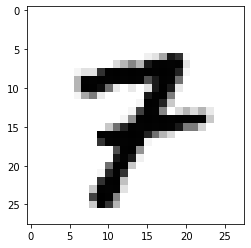

In [14]:
plt.imshow(img, cmap="Greys")

In [16]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    npimg = np.squeeze(npimg)
    plt.imshow(npimg)

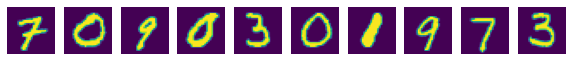

In [19]:
plt.figure(figsize=(10, 1))
for i, img in enumerate(imgs[:10]):
    plt.subplot(1, 10, i+1)
    imshow(img)
    plt.axis('off')
plt.show()

In [20]:
print(labels[:10])

tensor([7, 0, 9, 0, 3, 0, 1, 9, 7, 3])


In [66]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
#        x = x.view(-1, 16*4*4)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [67]:
net = Net()

In [68]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [80]:
for epoch in range(5): 
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0

print('Finished Training')

[1,   200] loss: 0.158
[1,   400] loss: 0.154
[1,   600] loss: 0.138
[1,   800] loss: 0.125
[2,   200] loss: 0.115
[2,   400] loss: 0.116
[2,   600] loss: 0.112
[2,   800] loss: 0.112
[3,   200] loss: 0.099
[3,   400] loss: 0.098
[3,   600] loss: 0.096
[3,   800] loss: 0.086
[4,   200] loss: 0.084
[4,   400] loss: 0.085
[4,   600] loss: 0.082
[4,   800] loss: 0.080
[5,   200] loss: 0.077
[5,   400] loss: 0.069
[5,   600] loss: 0.075
[5,   800] loss: 0.078
Finished Training


In [81]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

In [82]:
outputs = net(images)

In [83]:
outputs.shape

torch.Size([64, 10])

In [84]:
torch.max(outputs, 1)

torch.return_types.max(
values=tensor([14.4758, 13.9322,  9.3073, 11.9983, 13.1455, 11.0776,  9.7379, 11.0097,
        11.5591, 13.4025, 14.9520, 12.5147, 13.0627, 13.3472, 10.0618, 10.4107,
        11.0442, 14.2512,  9.2456, 13.5605, 12.0548, 11.8909, 10.4113, 15.7565,
         9.7904, 11.9887, 11.2371, 15.5609, 13.2792,  8.5787, 15.7396,  8.4954,
        16.1141,  9.2894, 15.7810, 12.1395, 12.5461,  9.9468, 13.1571,  9.8234,
         6.7995, 12.7113, 11.7695,  9.4244, 12.1883, 11.8589,  8.0648,  9.5160,
        12.5309, 13.5140, 11.6455, 16.6347, 15.2459,  9.9788, 16.8471, 11.5295,
        15.8592,  9.2331, 15.0430, 11.3845, 12.5055,  9.9416,  7.2315, 14.0313],
       grad_fn=<MaxBackward0>),
indices=tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2,
        4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3]))

In [85]:
_, predicted = torch.max(outputs, 1)

In [86]:
predicted

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2,
        4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3])

In [87]:
labels

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2,
        4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3])

In [88]:
(predicted == labels).type(torch.float32).mean().item()

1.0

In [89]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 97 %
